# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | bikenibeu village
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | tommot
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tolanaro
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | suncho corral
Processing Record 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,6.91,81,40,5.66,SJ,1691465680
1,port-aux-francais,-49.3500,70.2167,2.87,75,38,15.71,TF,1691465611
2,albany,42.6001,-73.9662,22.43,92,100,3.61,US,1691466089
3,atafu village,-8.5421,-172.5159,28.37,71,26,6.28,TK,1691466089
4,puerto ayora,-0.7393,-90.3518,24.19,88,100,2.68,EC,1691465708


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,6.91,81,40,5.66,SJ,1691465680
1,port-aux-francais,-49.3500,70.2167,2.87,75,38,15.71,TF,1691465611
2,albany,42.6001,-73.9662,22.43,92,100,3.61,US,1691466089
3,atafu village,-8.5421,-172.5159,28.37,71,26,6.28,TK,1691466089
4,puerto ayora,-0.7393,-90.3518,24.19,88,100,2.68,EC,1691465708


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

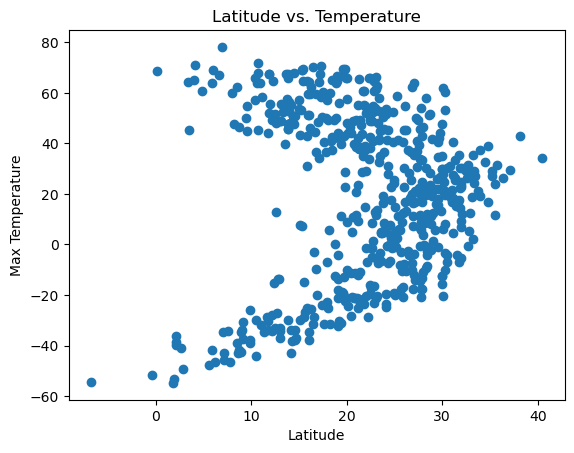

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Temperature")

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

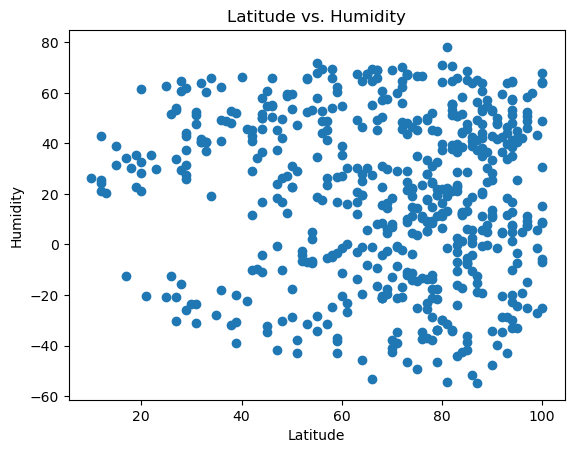

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

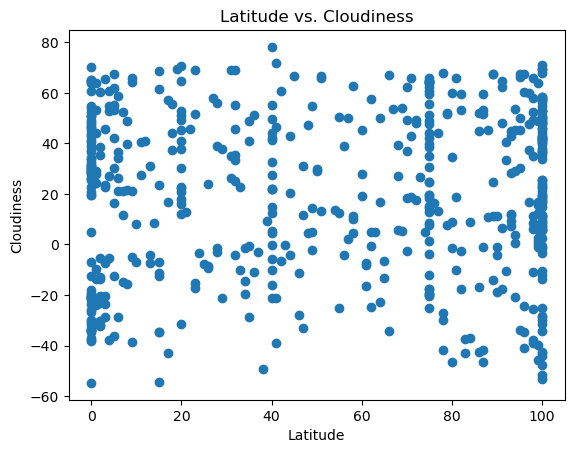

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

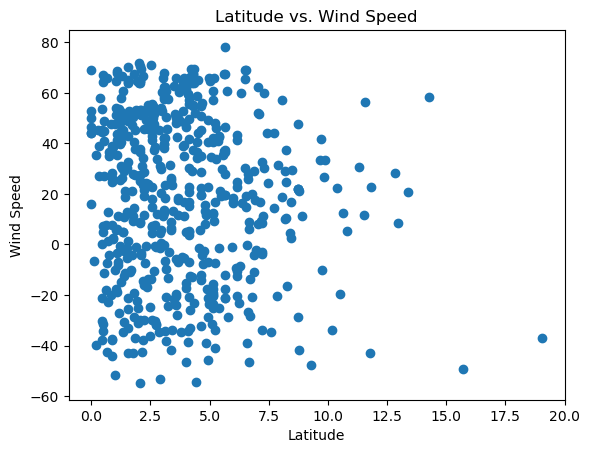

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    #Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,6.91,81,40,5.66,SJ,1691465680
2,albany,42.6001,-73.9662,22.43,92,100,3.61,US,1691466089
7,iskateley,67.6803,53.1512,11.83,65,89,4.32,RU,1691466090
8,bikenibeu village,1.3673,173.1241,28.98,84,75,1.54,KI,1691466090
10,tommot,58.9564,126.2925,25.21,49,6,4.49,RU,1691466090


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.87,75,38,15.71,TF,1691465611
3,atafu village,-8.5421,-172.5159,28.37,71,26,6.28,TK,1691466089
4,puerto ayora,-0.7393,-90.3518,24.19,88,100,2.68,EC,1691465708
5,bredasdorp,-34.5322,20.0403,11.34,92,15,2.85,ZA,1691465661
6,margaret river,-33.9500,115.0667,14.55,79,95,10.19,AU,1691465615


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.5856900814194362


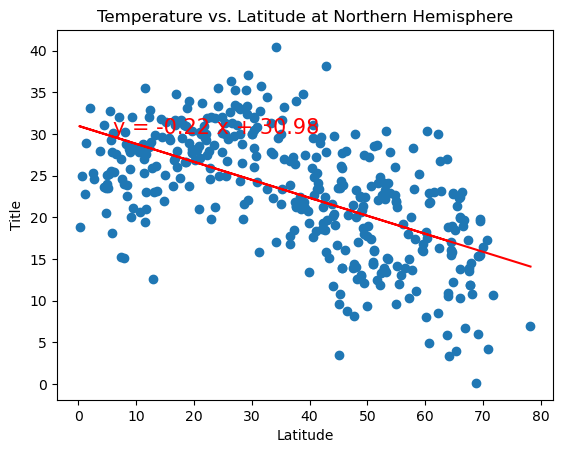

In [30]:
# Linear regression on Northern Hemisphere
plt.title('Temperature vs. Latitude at Northern Hemisphere')
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8412217191745938


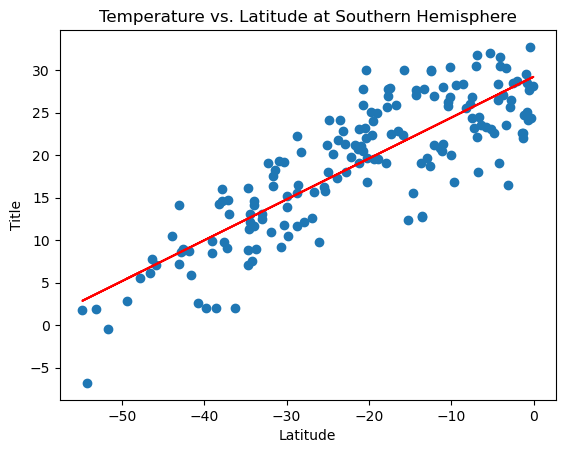

In [31]:
# Linear regression on Southern Hemisphere
plt.title('Temperature vs. Latitude at Southern Hemisphere')
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** There is a strong correlation between higher temperatures and being closer to the equator. 


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.13103918569641826


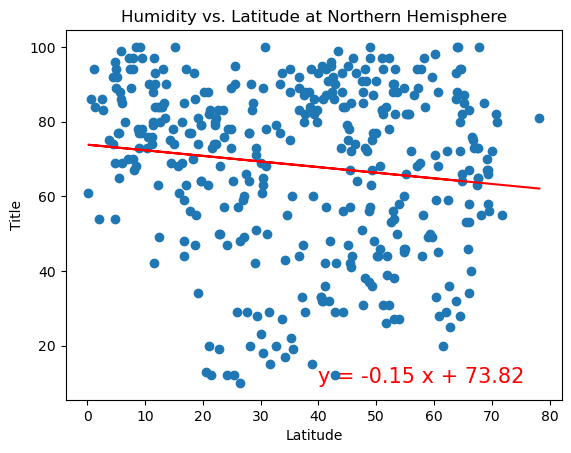

In [38]:
# Northern Hemisphere
plt.title('Humidity vs. Latitude at Northern Hemisphere')
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.02852087374524756


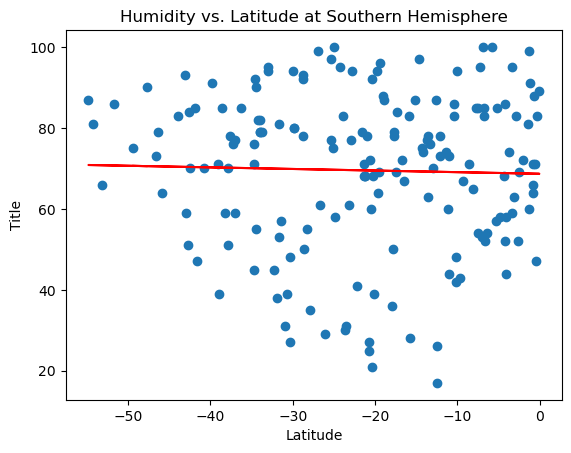

In [37]:
# Southern Hemisphere
plt.title('Humidity vs. Latitude at Southern Hemisphere')
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** There is not a strong relationship between Humidity and Latitude in either region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.10667660240893839


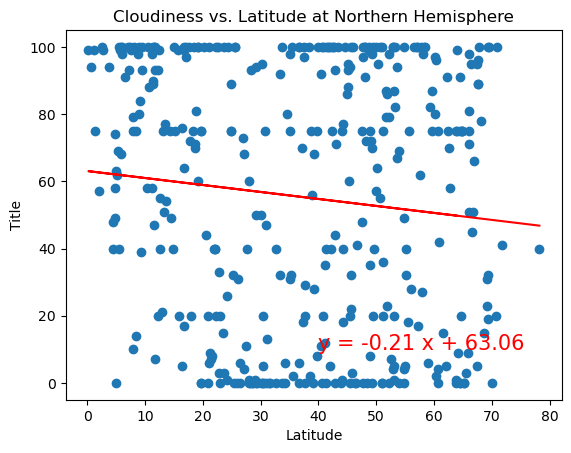

In [32]:
# Northern Hemisphere
plt.title('Cloudiness vs. Latitude at Northern Hemisphere')
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.06549355133991082


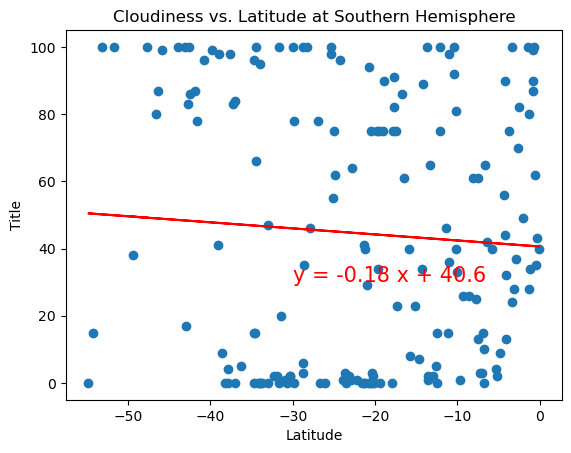

In [33]:
# Southern Hemisphere
plt.title('Cloudiness vs. Latitude at Southern Hemisphere')
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** There is not a strong relationship between either variable at each region.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.16268715183902985


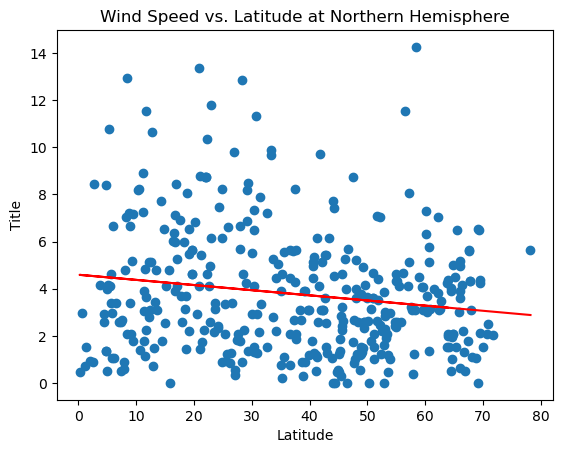

In [34]:
# Northern Hemisphere
plt.title('Wind Speed vs. Latitude at Northern Hemisphere')
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.09897754620902492


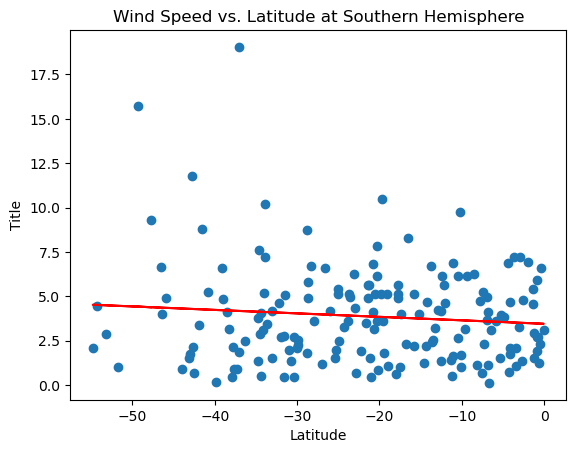

In [36]:
# Southern Hemisphere
plt.title('Wind Speed vs. Latitude at Southern Hemisphere')
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** There is not a strong relationship between the two variables. 